<a href="https://colab.research.google.com/github/LTJ508/Quantum_Computing/blob/main/Qiskit%20Practice/Qiskit_Practice_Lecture_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Qiskit Practice - Lecture 12</font>

## Install Library

In [1]:
!pip uninstall qiskit qiskit-aer
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install qiskit-ibm-provider

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=0e31b2023053be07d3d92bd958c53cc9b68bf7b85bdaff5b3460e9240e66829f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import Library First

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_provider.job import job_monitor  # Corrected import
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import transpile
import time

## More Gates

## Obsolete Operations

## Access and Run on real device

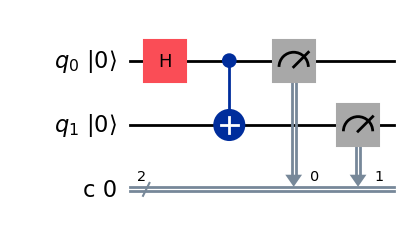

In [17]:
# create circuit
circuit = QuantumCircuit(2, 2)

# apply gate
circuit.h(0)
circuit.cx(0, 1)

# apply measurement
circuit.measure([0, 1], [0, 1])

# draw circuit
circuit.draw(initial_state=True, output="mpl")

### Run on Simulator

In [5]:
# select simulator
simulator = AerSimulator()

# save statevector
circuit.save_statevector()

## assemble
qobj = assemble(circuit)

# run
job = simulator.run(circuit)

# monitor job
job_monitor(job)

# get result
result = job.result()

Job Status: job has successfully run


### Result from simulator

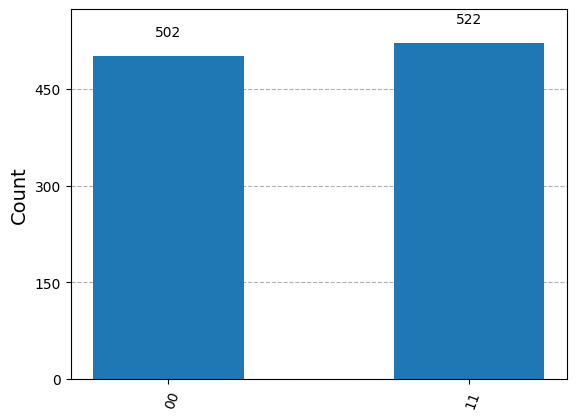

In [6]:
# get counts
counts = result.get_counts()

# plot histogram
plot_histogram(counts)

## Run on real device

In [18]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="6ae40c57c3cbeb90728f448dacdf19cae71b887c1b90dede86ee5be508931274be73b8cb6c9a755a9afda3a704736e4c92be7eaf31ddc9ffdc1f7d66be82150f", overwrite=True, set_as_default=True)

#service = QiskitRuntimeService(channel="ibm_cloud")

service = QiskitRuntimeService(channel="ibm_quantum")

#service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True, min_num_qubits=100)

t_qc = transpile(circuit, backend=backend, optimization_level=3)

job = backend.run(t_qc)
while job.status().name != 'DONE':
    print(f"Job Status: {job.status().name}")
    time.sleep(10)  # Check status every 10 seconds

# Get the result once the job is done
result = job.result()
print(result)

Job Status: QUEUED
Job Status: RUNNING
Result(backend_name='ibm_sherbrooke', backend_version='0.0.0', qobj_id='Unknown', job_id='Unknown', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1866, '0x3': 1964, '0x2': 100, '0x1': 70}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14], ['q', 15], ['q', 16], ['q', 17], ['q', 18], ['q', 19], ['q', 20], ['q', 21], ['q', 22], ['q', 23], ['q', 24], ['q', 25], ['q', 26], ['q', 27], ['q', 28], ['q', 29], ['q', 30], ['q', 31], ['q', 32], ['q', 33], ['q', 34], ['q', 35], ['q', 36], ['q', 37], ['q', 38], ['q', 39], ['q', 40], ['q', 41], ['q', 42], ['q', 43], ['q', 44], ['q', 45], ['q', 46], ['q', 47], ['q', 48], ['q', 49], ['q', 50], ['q', 51], ['q', 52], ['q', 53], ['q', 54], ['q', 55], ['q', 56], ['q', 57], ['q', 58], ['q', 59], ['q'

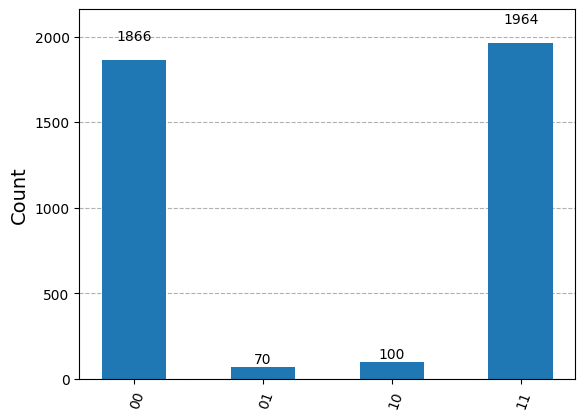

In [19]:
# get counts
counts = result.get_counts()

# plot histogram
plot_histogram(counts)